In [1]:
import pandas as pd
df = pd.read_csv('accepted_2007_to_2018Q4.csv')

/var/folders/99/n98vxxc504n_8_3y1p48rxpr0000gn/T/ipykernel_73231/496701700.py:2: DtypeWarning: Columns (0: id, 1: desc, 2: next_pymnt_d, 3: verification_status_joint, 4: sec_app_earliest_cr_line, 5: hardship_type, 6: hardship_reason, 7: hardship_status, 8: hardship_start_date, 9: hardship_end_date, 10: payment_plan_start_date, 11: hardship_loan_status, 12: debt_settlement_flag_date, 13: settlement_status, 14: settlement_date) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv')


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [3]:
df['loan_status'].unique()

<StringArray>
[                                         'Fully Paid',
                                             'Current',
                                         'Charged Off',
                                     'In Grace Period',
                                  'Late (31-120 days)',
                                   'Late (16-30 days)',
                                             'Default',
                                                   nan,
  'Does not meet the credit policy. Status:Fully Paid',
 'Does not meet the credit policy. Status:Charged Off']
Length: 10, dtype: str

Proxy Covenant Analysis

In [4]:
COVENANT_RULES = {
    "max_dti": 40,
    "min_income": 30000,              
    "max_installment_ratio": 0.20,     

    "min_fico": 660,
    "max_delinq_2yrs": 0,
    "max_current_delinq": 0,
    "max_public_records": 0,

    "max_utilization": 75,
    "max_inquiries_6m": 3,
    "max_inquiries_12m": 6,
}


In [5]:
import numpy as np
import pandas as pd

df = df.copy()

df["covenant_dti"] = (
    (df["dti"].fillna(df["dti_joint"])) <= COVENANT_RULES["max_dti"]
)

df["covenant_income"] = (
    df["annual_inc"].fillna(df["annual_inc_joint"]) 
    >= COVENANT_RULES["min_income"]
)

df["installment_income_ratio"] = (
    df["installment"] / df["annual_inc"]
)

df["covenant_installment_burden"] = (
    df["installment_income_ratio"] 
    <= COVENANT_RULES["max_installment_ratio"]
)


df["fico_mid"] = (
    df["fico_range_low"] + df["fico_range_high"]
) / 2

df["covenant_fico"] = (
    df["fico_mid"] >= COVENANT_RULES["min_fico"]
)

df["covenant_recent_delinq"] = (
    (df["delinq_2yrs"] <= COVENANT_RULES["max_delinq_2yrs"]) &
    (df["acc_now_delinq"] <= COVENANT_RULES["max_current_delinq"])
)

df["covenant_public_records"] = (
    (df["pub_rec"] == 0) &
    (df["tax_liens"] == 0) &
    (df["pub_rec_bankruptcies"] == 0)
)


df["max_util"] = df[["revol_util", "all_util", "bc_util"]].max(axis=1)

df["covenant_utilization"] = (
    df["max_util"] <= COVENANT_RULES["max_utilization"]
)

df["covenant_inquiries"] = (
    (df["inq_last_6mths"] <= COVENANT_RULES["max_inquiries_6m"]) &
    (df["inq_last_12m"] <= COVENANT_RULES["max_inquiries_12m"])
)


In [6]:
COVENANT_COLUMNS = [
    "covenant_dti",
    "covenant_income",
    "covenant_installment_burden",
    "covenant_fico",
    "covenant_recent_delinq",
    "covenant_public_records",
    "covenant_utilization",
    "covenant_inquiries",
]

df["num_covenant_violations"] = (
    (~df[COVENANT_COLUMNS]).sum(axis=1)
)

df["all_covenants_pass"] = (
    df["num_covenant_violations"] == 0
)


In [7]:
summary = (
    df[COVENANT_COLUMNS]
    .mean()
    .rename("pass_rate")
    .to_frame()
)

summary["fail_rate"] = 1 - summary["pass_rate"]
summary.sort_values("fail_rate", ascending=False)


,pass_rate,fail_rate
covenant_inquiries,0.582804,0.417196
covenant_utilization,0.615363,0.384637
covenant_recent_delinq,0.813512,0.186488
covenant_public_records,0.841098,0.158902
covenant_income,0.939909,0.060091
covenant_dti,0.987963,0.012037
covenant_installment_burden,0.999075,0.000925
covenant_fico,0.999769,0.000231


In [8]:
violation_table = (
    df[COVENANT_COLUMNS]
    .apply(lambda x: (~x).sum())
    .rename("num_violations")
    .to_frame()
)

violation_table["violation_pct"] = (
    violation_table["num_violations"] / len(df)
)

violation_table.sort_values("violation_pct", ascending=False)


,num_violations,violation_pct
covenant_inquiries,943156,0.417196
covenant_utilization,869549,0.384637
covenant_recent_delinq,421593,0.186488
covenant_public_records,359229,0.158902
covenant_income,135848,0.060091
covenant_dti,27211,0.012037
covenant_installment_burden,2092,0.000925
covenant_fico,522,0.000231


In [9]:
df =df.dropna(subset = ["loan_status"] )
df = df[df['loan_status']!='Current']

In [10]:
print(df['loan_status'].unique())

<StringArray>
[                                         'Fully Paid',
                                         'Charged Off',
                                     'In Grace Period',
                                  'Late (31-120 days)',
                                   'Late (16-30 days)',
                                             'Default',
  'Does not meet the credit policy. Status:Fully Paid',
 'Does not meet the credit policy. Status:Charged Off']
Length: 8, dtype: str


In [11]:
mapping = {
    "Charged Off": 1,
    "Default":1,
    "Does not meet the credit policy. Status:Charged Off":1,
    "Late (16-30 days)":1,
    "Late (31-120 days)":1, 
    "In Grace Period":1,
    "Fully Paid":0,
    "Does not meet the credit policy. Status:Fully Paid":0
}

df["loan_status_num"] = df["loan_status"].map(mapping)


In [12]:
print( df['loan_status_num'].unique() ) 

[0 1]


In [13]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,covenant_dti,covenant_income,installment_income_ratio,covenant_installment_burden,fico_mid,covenant_fico,covenant_recent_delinq,covenant_public_records,max_util,covenant_utilization,covenant_inquiries,num_covenant_violations,all_covenants_pass,loan_status_num
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True,True,0.002237,True,677.0,True,True,True,37.2,True,True,0,True,0
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,Na

In [14]:
df.isnull().sum()

id                               0
member_id                  1382351
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
                            ...   
covenant_utilization             0
covenant_inquiries               0
num_covenant_violations          0
all_covenants_pass               0
loan_status_num                  0
Length: 165, dtype: int64

Loan Status Counts:
Paid (0): 1,078,739
Delinquency/Default (1): 303,612


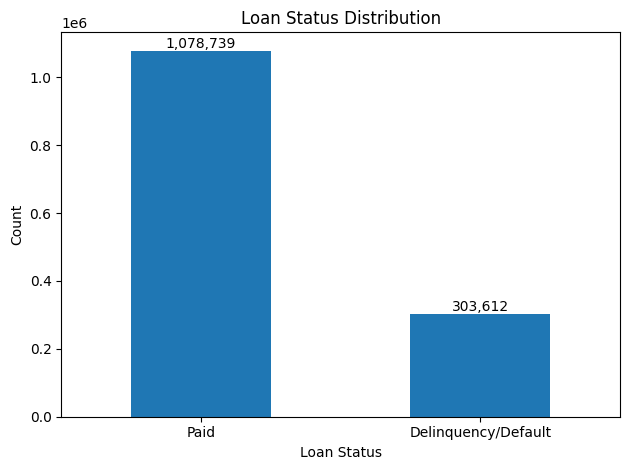

In [15]:
import matplotlib.pyplot as plt

counts = df['loan_status_num'].value_counts().sort_index()

# Print counts
print("Loan Status Counts:")
print(f"Paid (0): {counts[0]:,}")
print(f"Delinquency/Default (1): {counts[1]:,}")

# Plot
ax = counts.plot(kind='bar')
plt.xticks([0, 1], ['Paid', 'Delinquency/Default'], rotation=0)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')

# Add count labels on bars
for i, v in enumerate(counts.values):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

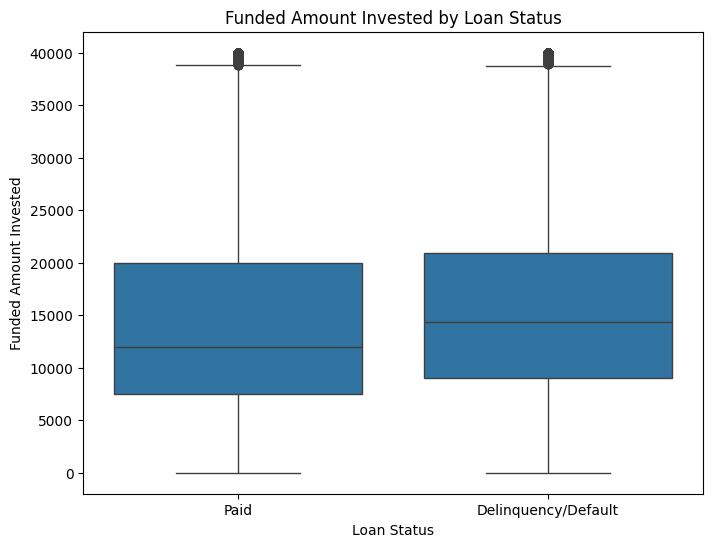

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status_num', y='funded_amnt_inv')
plt.xticks([0, 1], ['Paid', 'Delinquency/Default'])
plt.xlabel('Loan Status')
plt.ylabel('Funded Amount Invested')
plt.title('Funded Amount Invested by Loan Status')
plt.show()

NO significant different, but slight insight on customer with higher issued amount are prone to more default. However this might have combined effect with other features

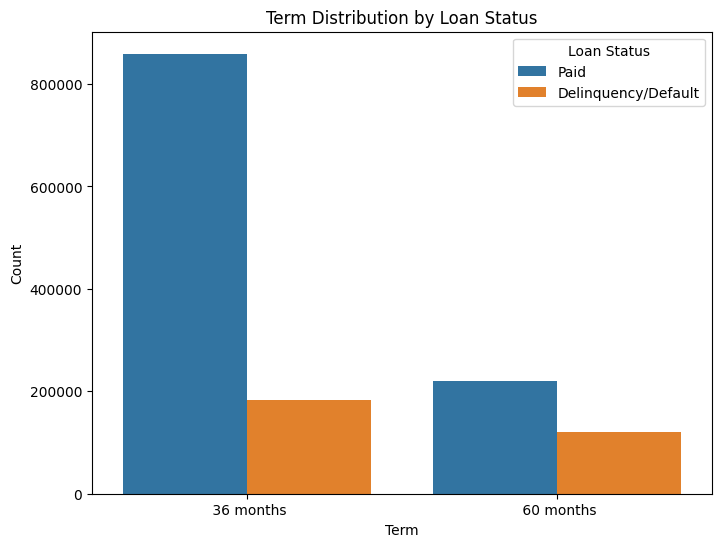

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='term', hue='loan_status_num')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Term Distribution by Loan Status')
plt.legend(title='Loan Status', labels=['Paid', 'Delinquency/Default'])
plt.show()

Longer Loan Terms have more percentage of default account

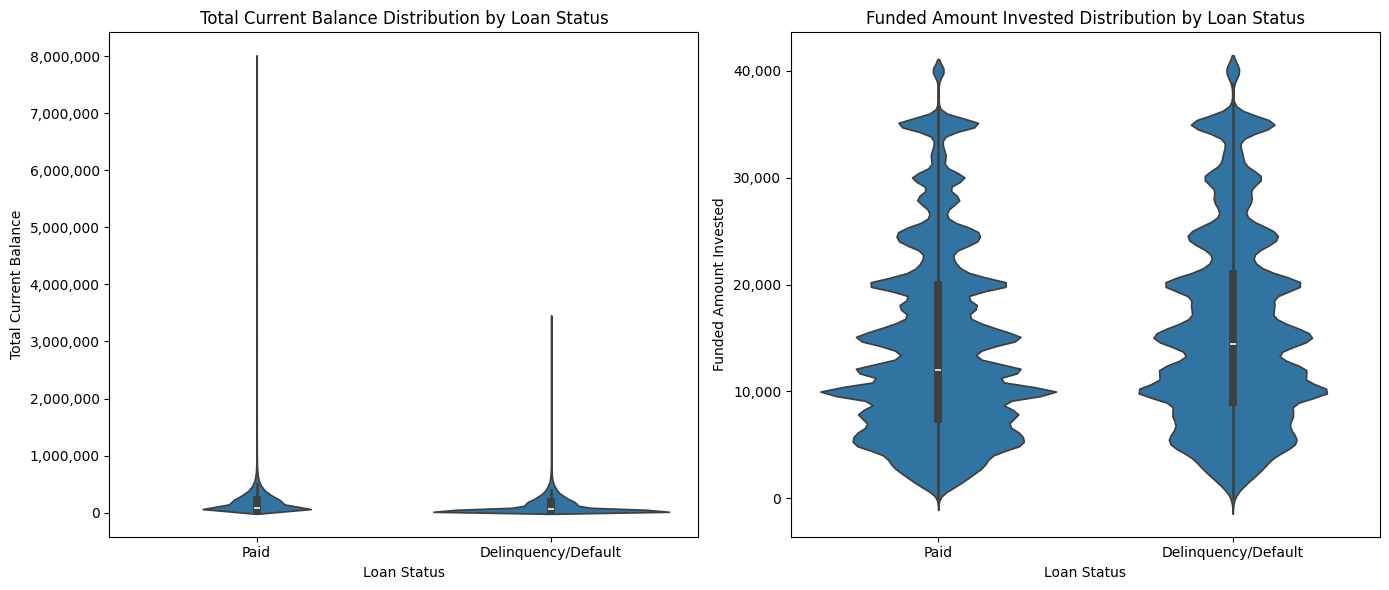

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# tot_cur_bal
sns.violinplot(data=df, x='loan_status_num', y='tot_cur_bal', ax=axes[0])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Paid', 'Delinquency/Default'])
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Total Current Balance')
axes[0].set_title('Total Current Balance Distribution by Loan Status')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x):,}'))

# funded_amnt_inv
sns.violinplot(data=df, x='loan_status_num', y='funded_amnt_inv', ax=axes[1])
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Paid', 'Delinquency/Default'])
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Funded Amount Invested')
axes[1].set_title('Funded Amount Invested Distribution by Loan Status')
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

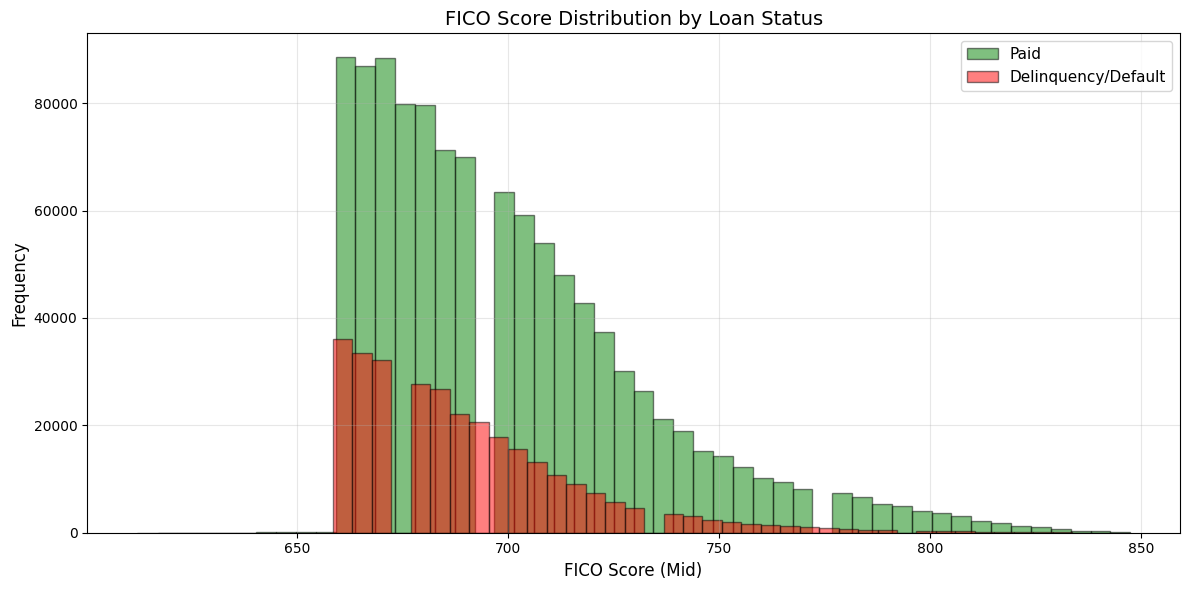

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Histogram
for status, label, color in [(0, 'Paid', 'green'), (1, 'Delinquency/Default', 'red')]:
    subset = df[df['loan_status_num'] == status]['fico_mid']
    plt.hist(subset, bins=50, alpha=0.5, label=label, color=color, edgecolor='black')

plt.xlabel('FICO Score (Mid)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('FICO Score Distribution by Loan Status', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

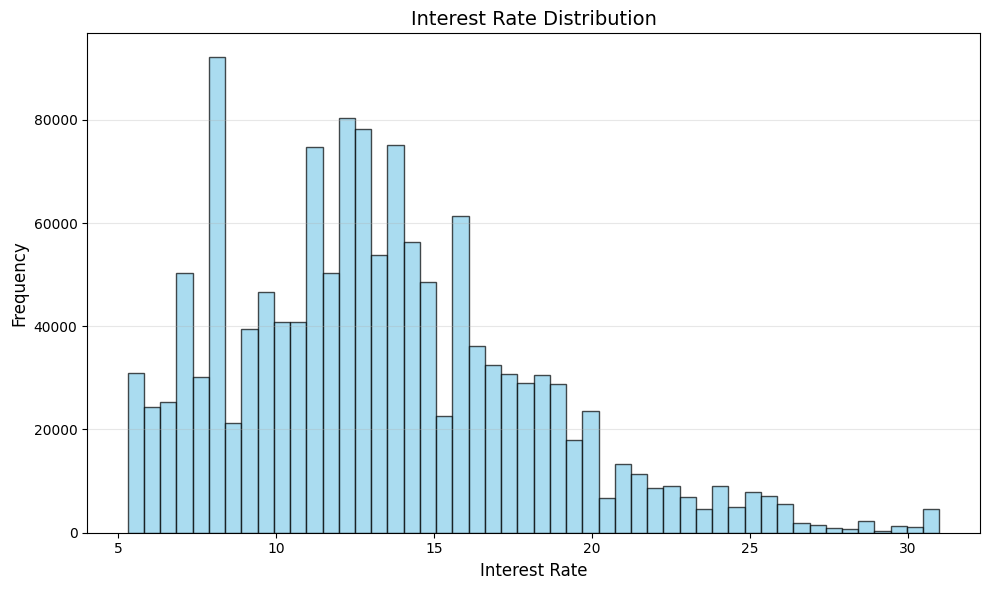

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['int_rate'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Interest Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Interest Rate Distribution', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



In [21]:
df['revol_bal_joint'] = df['revol_bal_joint'].fillna(0)


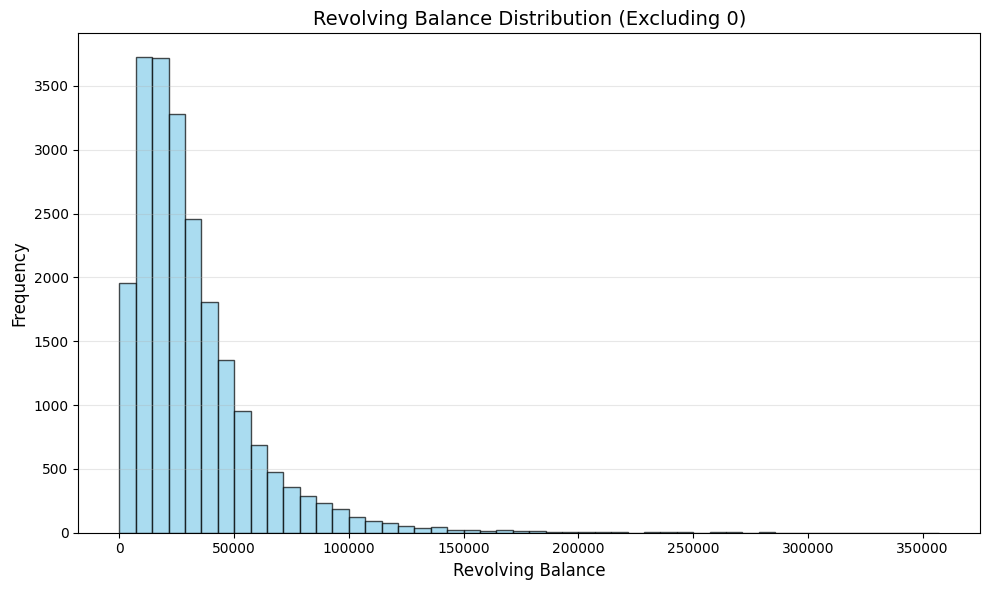

Number of accounts with non-zero revolving balance: 22059


In [22]:
# Exclude accounts with 0 balance
non_zero_bal = df[df['revol_bal_joint'] != 0]['revol_bal_joint']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(non_zero_bal, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Revolving Balance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revolving Balance Distribution (Excluding 0)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print(f"Number of accounts with non-zero revolving balance: {non_zero_bal.count()}")


In [23]:
# Interest rate: '10.5%' to 0.105
if df['int_rate'].dtype == 'float64':
    df['int_rate'] = df['int_rate'] / 100

In [24]:
# Revolving utilisation: '85.5%' to 85.5
if df['revol_util'].dtype == 'float64':
    df['revol_util'] = df['revol_util'] / 100

In [25]:
# Employment length: '10+ years' to 10
df['emp_length'] = df['emp_length'].str.extract(r'(\d+)').fillna(0).astype(int)

In [26]:
df['emp_length']

0          10
1          10
2          10
4           3
5           4
           ..
2260688     5
2260690     9
2260691     3
2260692    10
2260697     6
Name: emp_length, Length: 1382351, dtype: int64

In [27]:
# Loan term: ' 36 months' to 36  
df['term'] = df['term'].str.extract(r'(\d+)').fillna(0).astype(int)

In [28]:
df['term']

0          36
1          36
2          60
4          60
5          36
           ..
2260688    60
2260690    60
2260691    60
2260692    60
2260697    60
Name: term, Length: 1382351, dtype: int64

In [29]:

# The dataset has multiple FICO columns, let's unify them
fico_cols = [col for col in df.columns if 'fico' in col.lower()]

if fico_cols:    
    # we have a range
    if 'fico_range_low' in df.columns and 'fico_range_high' in df.columns:
        df['fico_score'] = (df['fico_range_low'] + df['fico_range_high']) / 2
    # Otherwise
    elif len(fico_cols) > 0:
        df['fico_score'] = df[fico_cols[0]]      
else:
    # No FICO data, let's handle it
    df['fico_score'] = 700  #(default value = 700 US average)

In [30]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,covenant_dti,covenant_income,installment_income_ratio,covenant_installment_burden,fico_mid,covenant_fico,covenant_recent_delinq,covenant_public_records,max_util,covenant_utilization,covenant_inquiries,num_covenant_violations,all_covenants_pass,loan_status_num,fico_score
0,68407277,NaN,3600.0,3600.0,3600.0,36,0.1399,123.03,C,C4,leadman,10,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,0.297,13.0,w,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True,True,0.002237,True,677.0,True,True,True,37.2,True,True,0,True,0,677.0
1,68355089,NaN,24700.0,24700.0,24700.0,36,0.1199,820.28,C,C1,Engineer,10,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,0.192,38.0,w,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,I

Feature Engineering and Selection

In [31]:
# Numerical explanatory variables
num_features = [
    'loan_amnt',
    'funded_amnt',
    'int_rate',
    'installment',
    'annual_inc',
    'dti',
    'delinq_2yrs', #New 
    'fico_score',
    'inq_last_6mths', #New
    'open_acc', #New
    'pub_rec',  #New
    'revol_bal',
    'revol_util',
    'out_prncp',
    'last_pymnt_amnt',
    'tot_cur_bal',
    'total_rev_hi_lim',
    'emp_length',
    'total_acc',
    'loan_status_num',
    'term'
]

# Categorical explanatory variables
cat_features = [
    #'sub_grade',
    #'emp_title',
    'home_ownership',
    'verification_status',
    'purpose',
    #'initial_list_status'
]


In [32]:
selected_features = num_features + cat_features

df_model = df[selected_features].copy()


In [33]:
df_model

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_score,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,emp_length,total_acc,loan_status_num,term,home_ownership,verification_status,purpose
0,3600.0,3600.0,0.1399,123.03,55000.0,5.91,0.0,677.0,1.0,7.0,0.0,2765.0,0.297,0.0,122.67,144904.0,9300.0,10,13.0,0,36,MORTGAGE,Not Verified,debt_consolidation
1,24700.0,24700.0,0.1199,820.28,65000.0,16.06,1.0,717.0,4.0,22.0,0.0,21470.0,0.192,0.0,926.35,204396.0,111800.0,10,38.0,0,36,MORTGAGE,Not Verified,small_business
2,20000.0,20000.0,0.1078,432.66,63000.0,10.78,0.0,697.0,0.0,6.0,0.0,7869.0,0.562,0.0,15813.30,189699.0,14000.0,10,18.0,0,60,MORTGAGE,Not Verified,home_improvement
4,10400.0,10400.0,0.2245,289.91,104433.0,25.37,1.0,697.0,3.0,12.0,0.0,21929.0,0.645,0.0,10128.96,331730.0,34000.0,3,35.0,0,60,MORTGAGE,Source Verified,major_purchase
5,11950.0,11950.0,0.1344,405.18,34000.0,10.20,0.0,692.0,0.0,5.0,0.0,8822.0,0.684,0.0,7653.56,12798.0,12900.0,4,6.0,0,36,RENT,Source Verified,debt_consolidation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.0,18000.0,0.0949,377.95,130000.0,20.59,0.0,737.0,1.0,17.0,0.0,23833.0,0.340,0.0,12828.77,168758.0,70100.0,5,39.0,0,60,OWN,Not Verified,home_improvement
2260690,29400.0,29400.0,0.1399,683.94,180792.0,22.03,0.0,707.0,1.0,16.0,0.0,77480.0,0.852,0.0,22192.81,663465.0,86500.0,9,32.0,0,60,MORTGAGE,Not Verified,debt_consolidation
2260691,32000.0,32000.0,0.1449,752.74,157000.0,10.34,0.0,737.0,0.0,14.0,0.0,111598.0,0.274,0.0,752.74,408701.0,207500.0,3,18.0,1,60,MORTGAGE,Source Verified,home_improvement
2260692,16000.0,16000.0,0.1279,362.34,150000.0,12.25,0.0,667.0,0.0,12.0,4.0,7700.0,0.550,0.0,12874.54,65797.0,14000.0,10,28.0,0,60,RENT,Not Verified,medical


In [34]:
print("Number of selected features:", df_model.shape[1])
print("Missing columns:", set(selected_features) - set(df.columns))


Number of selected features: 24
Missing columns: set()


In [35]:
df_model.isnull().sum()

loan_amnt                  0
funded_amnt                0
int_rate                   0
installment                0
annual_inc                 4
dti                      412
delinq_2yrs               29
fico_score                 0
inq_last_6mths            30
open_acc                  29
pub_rec                   29
revol_bal                  0
revol_util               935
out_prncp                  0
last_pymnt_amnt            0
tot_cur_bal            70276
total_rev_hi_lim       70276
emp_length                 0
total_acc                 29
loan_status_num            0
term                       0
home_ownership             0
verification_status        0
purpose                    0
dtype: int64

In [36]:
# Later consider for imputation 
# df_model = df_model.dropna(subset=['emp_title'])


In [37]:
cols = [
    'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
    'revol_util', 'tot_cur_bal', 'total_rev_hi_lim', 'total_acc'
]

summary = pd.DataFrame({
    'null_count': df_model[cols].isna().sum(),
    'zero_count': (df_model[cols] == 0).sum()
})

summary


,null_count,zero_count
dti,412,925
delinq_2yrs,29,1115174
inq_last_6mths,30,790784
open_acc,29,15
pub_rec,29,1147978
revol_util,935,7325
tot_cur_bal,70276,409
total_rev_hi_lim,70276,648
total_acc,29,0


In [38]:
df_model

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_score,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,emp_length,total_acc,loan_status_num,term,home_ownership,verification_status,purpose
0,3600.0,3600.0,0.1399,123.03,55000.0,5.91,0.0,677.0,1.0,7.0,0.0,2765.0,0.297,0.0,122.67,144904.0,9300.0,10,13.0,0,36,MORTGAGE,Not Verified,debt_consolidation
1,24700.0,24700.0,0.1199,820.28,65000.0,16.06,1.0,717.0,4.0,22.0,0.0,21470.0,0.192,0.0,926.35,204396.0,111800.0,10,38.0,0,36,MORTGAGE,Not Verified,small_business
2,20000.0,20000.0,0.1078,432.66,63000.0,10.78,0.0,697.0,0.0,6.0,0.0,7869.0,0.562,0.0,15813.30,189699.0,14000.0,10,18.0,0,60,MORTGAGE,Not Verified,home_improvement
4,10400.0,10400.0,0.2245,289.91,104433.0,25.37,1.0,697.0,3.0,12.0,0.0,21929.0,0.645,0.0,10128.96,331730.0,34000.0,3,35.0,0,60,MORTGAGE,Source Verified,major_purchase
5,11950.0,11950.0,0.1344,405.18,34000.0,10.20,0.0,692.0,0.0,5.0,0.0,8822.0,0.684,0.0,7653.56,12798.0,12900.0,4,6.0,0,36,RENT,Source Verified,debt_consolidation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.0,18000.0,0.0949,377.95,130000.0,20.59,0.0,737.0,1.0,17.0,0.0,23833.0,0.340,0.0,12828.77,168758.0,70100.0,5,39.0,0,60,OWN,Not Verified,home_improvement
2260690,29400.0,29400.0,0.1399,683.94,180792.0,22.03,0.0,707.0,1.0,16.0,0.0,77480.0,0.852,0.0,22192.81,663465.0,86500.0,9,32.0,0,60,MORTGAGE,Not Verified,debt_consolidation
2260691,32000.0,32000.0,0.1449,752.74,157000.0,10.34,0.0,737.0,0.0,14.0,0.0,111598.0,0.274,0.0,752.74,408701.0,207500.0,3,18.0,1,60,MORTGAGE,Source Verified,home_improvement
2260692,16000.0,16000.0,0.1279,362.34,150000.0,12.25,0.0,667.0,0.0,12.0,4.0,7700.0,0.550,0.0,12874.54,65797.0,14000.0,10,28.0,0,60,RENT,Not Verified,medical


In [39]:
df_model.dropna()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_score,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,emp_length,total_acc,loan_status_num,term,home_ownership,verification_status,purpose
0,3600.0,3600.0,0.1399,123.03,55000.0,5.91,0.0,677.0,1.0,7.0,0.0,2765.0,0.297,0.0,122.67,144904.0,9300.0,10,13.0,0,36,MORTGAGE,Not Verified,debt_consolidation
1,24700.0,24700.0,0.1199,820.28,65000.0,16.06,1.0,717.0,4.0,22.0,0.0,21470.0,0.192,0.0,926.35,204396.0,111800.0,10,38.0,0,36,MORTGAGE,Not Verified,small_business
2,20000.0,20000.0,0.1078,432.66,63000.0,10.78,0.0,697.0,0.0,6.0,0.0,7869.0,0.562,0.0,15813.30,189699.0,14000.0,10,18.0,0,60,MORTGAGE,Not Verified,home_improvement
4,10400.0,10400.0,0.2245,289.91,104433.0,25.37,1.0,697.0,3.0,12.0,0.0,21929.0,0.645,0.0,10128.96,331730.0,34000.0,3,35.0,0,60,MORTGAGE,Source Verified,major_purchase
5,11950.0,11950.0,0.1344,405.18,34000.0,10.20,0.0,692.0,0.0,5.0,0.0,8822.0,0.684,0.0,7653.56,12798.0,12900.0,4,6.0,0,36,RENT,Source Verified,debt_consolidation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.0,18000.0,0.0949,377.95,130000.0,20.59,0.0,737.0,1.0,17.0,0.0,23833.0,0.340,0.0,12828.77,168758.0,70100.0,5,39.0,0,60,OWN,Not Verified,home_improvement
2260690,29400.0,29400.0,0.1399,683.94,180792.0,22.03,0.0,707.0,1.0,16.0,0.0,77480.0,0.852,0.0,22192.81,663465.0,86500.0,9,32.0,0,60,MORTGAGE,Not Verified,debt_consolidation
2260691,32000.0,32000.0,0.1449,752.74,157000.0,10.34,0.0,737.0,0.0,14.0,0.0,111598.0,0.274,0.0,752.74,408701.0,207500.0,3,18.0,1,60,MORTGAGE,Source Verified,home_improvement
2260692,16000.0,16000.0,0.1279,362.34,150000.0,12.25,0.0,667.0,0.0,12.0,4.0,7700.0,0.550,0.0,12874.54,65797.0,14000.0,10,28.0,0,60,RENT,Not Verified,medical


Loan Status Counts:
Paid (0): 1,078,739
Delinquency/Default (1): 303,612


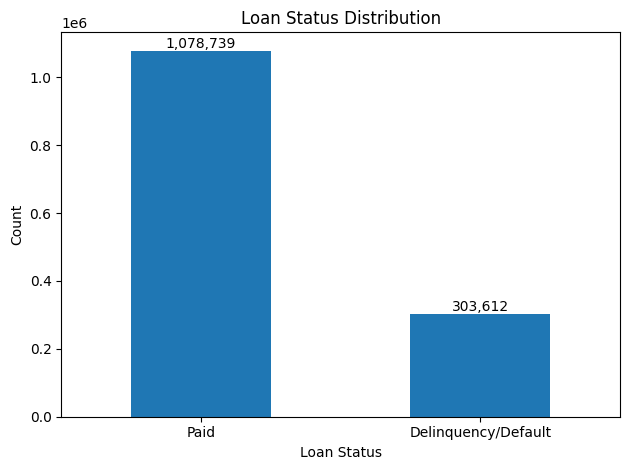

In [40]:
import matplotlib.pyplot as plt

counts = df_model['loan_status_num'].value_counts().sort_index()

# Print counts
print("Loan Status Counts:")
print(f"Paid (0): {counts[0]:,}")
print(f"Delinquency/Default (1): {counts[1]:,}")

# Plot
ax = counts.plot(kind='bar')
plt.xticks([0, 1], ['Paid', 'Delinquency/Default'], rotation=0)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')

# Add count labels on bars
for i, v in enumerate(counts.values):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [41]:
df_encoded = pd.get_dummies(
    df_model,
    columns=cat_features,
    drop_first=True
)


In [42]:
X = df_encoded.values

In [43]:
X

array([[3600.0, 3600.0, 0.1399, ..., False, False, False],
       [24700.0, 24700.0, 0.1199, ..., True, False, False],
       [20000.0, 20000.0, 0.10779999999999999, ..., False, False, False],
       ...,
       [32000.0, 32000.0, 0.1449, ..., False, False, False],
       [16000.0, 16000.0, 0.12789999999999999, ..., False, False, False],
       [24000.0, 24000.0, 0.1449, ..., False, False, False]],
      shape=(1382351, 41), dtype=object)

In [44]:
df_encoded

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_score,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,emp_length,total_acc,loan_status_num,term,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,3600.0,3600.0,0.1399,123.03,55000.0,5.91,0.0,677.0,1.0,7.0,0.0,2765.0,0.297,0.0,122.67,144904.0,9300.0,10,13.0,0,36,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,24700.0,24700.0,0.1199,820.28,65000.0,16.06,1.0,717.0,4.0,22.0,0.0,21470.0,0.192,0.0,926.35,204396.0,111800.0,10,38.0,0,36,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,20000.0,20000.0,0.1078,432.66,63000.0,10.78,0.0,697.0,0.0,6.0,0.0,7869.0,0.562,0.0,15813.30,189699.0,14000.0,10,18.0,0,60,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,10400.0,10400.0,0.2245,289.91,104433.0,25.37,1.0,697.0,3.0,12.0,0.0,21929.0,0.645,0.0,10128.96,331730.0,34000.0,3,35.0,0,60,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
5,11950.0,11950.0,0.1344,405.18,34000.0,10.20,0.0,692.0,0.0,5.0,0.0,8822.0,0.684,0.0,7653.56,12798.0,12900.0,4,6.0,0,36,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.0,18000.0,0.0949,377.95,130000.0,20.59,0.0,737.0,1.0,17.0,0.0,23833.0,0.340,0.0,12828.77,168758.0,70100.0,5,39.0,0,60,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2260690,29400.0,29400.0,0.1399,683.94,180792.0,22.03,0.0,707.0,1.0,16.0,0.0,77480.0,0.852,0.0,22192.81,663465.0,86500.0,9,32.0,0,60,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2260691,32000.0,32000.0,0.1449,752.74,157000.0,10.34,0.0,737.0,0.0,14.0,0.0,111598.0,0.274,0.0,752.74,408701.0,207500.0,3,18.0,1,60,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2260692,16000.0,16000.0,0.1279,362.34,150000.0,12.25,0.0,667.0,0.0,12.0,4.0,7700.0,0.550,0.0,12874.54,65797.0,14000.0,10,28.0,0,60,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [45]:
df_encoded["loan_status_num"].value_counts()

loan_status_num
0    1078739
1     303612
Name: count, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['loan_status_num'])
y = df_encoded['loan_status_num']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)


In [47]:
import pandas as pd

print("Train class distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nTest class distribution:")
print(pd.Series(y_test).value_counts(normalize=True))


Train class distribution:
loan_status_num
0    0.780366
1    0.219634
Name: proportion, dtype: float64

Test class distribution:
loan_status_num
0    0.780365
1    0.219635
Name: proportion, dtype: float64


In [48]:
X_train

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_score,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,emp_length,total_acc,term,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
1628142,10000.0,10000.0,0.1343,339.02,91092.0,1.53,0.0,682.0,1.0,10.0,0.0,3808.0,0.515,0.0,374.54,NaN,NaN,2,27.0,36,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2259196,10000.0,10000.0,0.1279,335.93,60000.0,12.30,0.0,717.0,1.0,10.0,0.0,4813.0,0.379,0.0,33.28,45462.0,12700.0,1,10.0,36,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
460820,2500.0,2500.0,0.0734,77.59,53700.0,8.49,0.0,817.0,0.0,8.0,0.0,2806.0,0.160,0.0,2072.46,20346.0,17500.0,3,15.0,36,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1699755,35000.0,35000.0,0.0799,1096.62,140000.0,20.88,0.0,797.0,2.0,6.0,0.0,0.0,0.000,0.0,702.32,456306.0,5000.0,10,19.0,36,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
368385,35000.0,35000.0,0.1229,783.70,120000.0,20.47,0.0,722.0,0.0,12.0,0.0,40589.0,0.534,0.0,783.70,209485.0,76000.0,5,32.0,60,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737870,18000.0,18000.0,0.2149,491.94,48484.0,27.80,0.0,667.0,0.0,15.0,0.0,19677.0,0.365,0.0,491.94,124562.0,53900.0,9,36.0,60,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
31467,25000.0,25000.0,0.1448,860.29,150000.0,9.04,0.0,802.0,1.0,12.0,0.0,4787.0,0.089,0.0,13389.75,31706.0,24100.0,10,19.0,36,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
1161489,21000.0,21000.0,0.1561,506.34,95000.0,10.73,0.0,672.0,2.0,8.0,0.0,25189.0,0.875,0.0,11277.84,133359.0,28800.0,10,19.0,60,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1237025,18000.0,18000.0,0.1099,589.22,45000.0,17.47,0.0,702.0,0.0,10.0,0.0,25122.0,0.872,0.0,588.87,141719.0,28800.0,7,16.0,36,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
X_test

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_score,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,emp_length,total_acc,term,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,default_probability
1314102,30000.0,30000.0,0.2199,828.40,135000.0,25.96,1.0,687.0,3.0,28.0,0.0,57637.0,0.927,0.0,18868.24,508446.0,64400.0,3,50.0,60,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0.003033
482864,30000.0,30000.0,0.0993,967.03,150000.0,1.77,0.0,727.0,1.0,11.0,1.0,11582.0,0.330,0.0,22791.08,503683.0,35100.0,1,34.0,36,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0.000466
1299576,6000.0,6000.0,0.1199,199.26,30000.0,15.28,0.0,687.0,0.0,7.0,0.0,5423.0,0.638,0.0,199.14,13502.0,11500.0,10,11.0,36,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.332737
1978356,30000.0,30000.0,0.0759,934.43,320000.0,11.70,0.0,762.0,1.0,14.0,0.0,4326.0,0.075,0.0,28826.65,1012403.0,57600.0,10,46.0,36,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0.000326
60656,6000.0,6000.0,0.0917,191.28,55000.0,14.36,0.0,697.0,3.0,5.0,0.0,5092.0,0.780,0.0,2735.08,52022.0,6500.0,1,8.0,36,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0.000619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836270,12000.0,12000.0,0.1580,290.55,46000.0,6.52,0.0,667.0,3.0,6.0,0.0,9043.0,0.508,0.0,3279.77,322543.0,17800.0,7,13.0,60,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,0.003827
396836,25600.0,25600.0,0.0749,796.21,116500.0,12.81,0.0,702.0,0.0,18.0,1.0,23791.0,0.272,0.0,17826.90,53867.0,87500.0,9,32.0,36,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.000271
71267,5000.0,5000.0,0.1367,170.09,70000.0,33.19,0.0,667.0,2.0,13.0,0.0,19215.0,0.640,0.0,170.09,164240.0,30000.0,10,23.0,36,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,0.549302
906723,12000.0,12000.0,0.1199,398.52,45000.0,15.28,0.0,727.0,1.0,11.0,0.0,7341.0,0.245,0.0,327.65,17145.0,30000.0,1,19.0,36,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,0.272689


In [49]:
y_train

1628142    0
2259196    0
460820     0
1699755    0
368385     1
          ..
1737870    1
31467      0
1161489    0
1237025    0
244185     0
Name: loan_status_num, Length: 967645, dtype: int64

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.model_selection import cross_val_score

# Define models
models = {
    'XGBoost': XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        eval_metric='logloss'
    ),
    
    'LightGBM': LGBMClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    ),
    
    'RandomForest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42
    )
}

# Define hyperparameter grids for RandomizedSearch
param_grids = {
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [4, 6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'max_depth': [4, 6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [31, 50, 100]
    },
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [6, 10, 15],
        'min_samples_split': [2, 5, 10]
    }
}


In [51]:
results = {}
trained_models = {}
confusion_matrices = {}

print("Training and tuning models...")

for name, model in models.items():
    print(f"\n{name}:")

    # Randomized hyperparameter search
    param_grid = param_grids[name]
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=5,            # number of random combinations
        scoring='roc_auc',
        cv=5,                # 3-fold CV for tuning
        random_state=42,
        n_jobs=-1
    )
    
    # Fit the search
    search.fit(X_train, y_train)
    
    # Get the best model
    best_model = search.best_estimator_
    trained_models[name] = best_model

    # Predictions on test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'AUC': auc,
        'F1-Score': f1,
        'CV AUC Mean': search.best_score_,   # mean CV score from RandomizedSearchCV
        'Best Params': search.best_params_
    }

    # Print summary
    print(f"  Best Hyperparameters: {search.best_params_}")
    print(f"  Accuracy:     {accuracy:.4f}")
    print(f"  AUC:          {auc:.4f}")
    print(f"  F1-Score:     {f1:.4f}")
    print(f"  CV AUC (from tuning): {search.best_score_:.4f}")
    print(f"  Confusion Matrix: TN={cm[0,0]:,} | FP={cm[0,1]:,} | FN={cm[1,0]:,} | TP={cm[1,1]:,}")
    print(f"\n  Classification Report:\n{classification_report(y_test, y_pred, target_names=['Paid', 'Default'])}")

print("\nAll models trained and tuned successfully.")

Training and tuning models...

XGBoost:
  Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.05}
  Accuracy:     0.9026
  AUC:          0.9597
  F1-Score:     0.7658
  CV AUC (from tuning): 0.9599
  Confusion Matrix: TN=308,320 | FP=15,302 | FN=25,077 | TP=66,007

  Classification Report:
              precision    recall  f1-score   support

        Paid       0.92      0.95      0.94    323622
     Default       0.81      0.72      0.77     91084

    accuracy                           0.90    414706
   macro avg       0.87      0.84      0.85    414706
weighted avg       0.90      0.90      0.90    414706


LightGBM:
  Best Hyperparameters: {'num_leaves': 100, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.05}
  Accuracy:     0.9041
  AUC:          0.9610
  F1-Score:     0.7692
  CV AUC (from tuning): 0.9609
  Confusion Matrix: TN=308,699 | FP=14,923 | FN=24,830 | TP=66,254

  Classification Report:
              precision    re

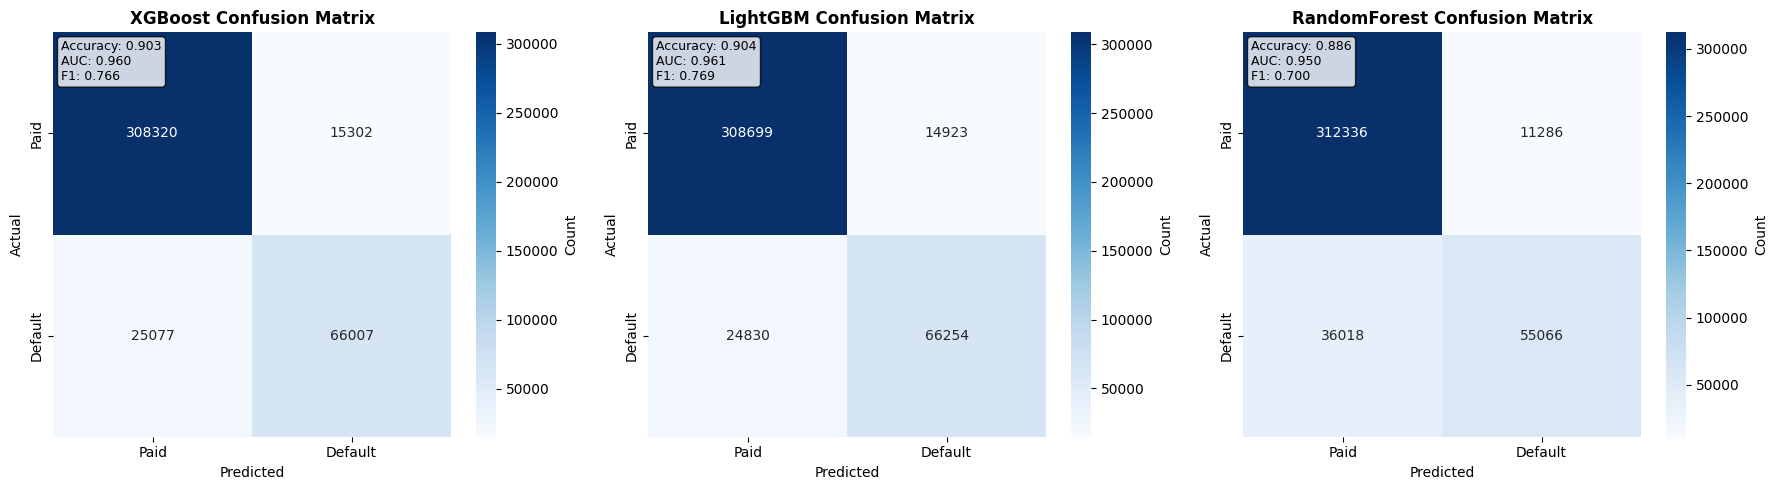

In [52]:
# Visualize Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cmap = 'Blues'
for idx, (name, cm) in enumerate(confusion_matrices.items()):
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[idx],
                cbar_kws={'label': 'Count'},
                xticklabels=['Paid', 'Default'],
                yticklabels=['Paid', 'Default'])
    
    axes[idx].set_title(f'{name} Confusion Matrix', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=10)
    axes[idx].set_ylabel('Actual', fontsize=10)
    
    # Add performance metrics as text
    accuracy = results[name]['Accuracy']
    auc = results[name]['AUC']
    f1 = results[name]['F1-Score']
    
    textstr = f'Accuracy: {accuracy:.3f}\nAUC: {auc:.3f}\nF1: {f1:.3f}'
    axes[idx].text(0.02, 0.98, textstr, transform=axes[idx].transAxes,
                   fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


Model Performance Comparison:
              Accuracy       AUC  F1-Score CV AUC Mean  \
XGBoost       0.902632  0.959737  0.765774    0.959878   
LightGBM      0.904142  0.961013  0.769228    0.960906   
RandomForest  0.885934  0.950454  0.699535    0.950194   

                                                    Best Params  
XGBoost       {'subsample': 1.0, 'n_estimators': 300, 'max_d...  
LightGBM      {'num_leaves': 100, 'n_estimators': 300, 'max_...  
RandomForest  {'n_estimators': 100, 'min_samples_split': 5, ...  


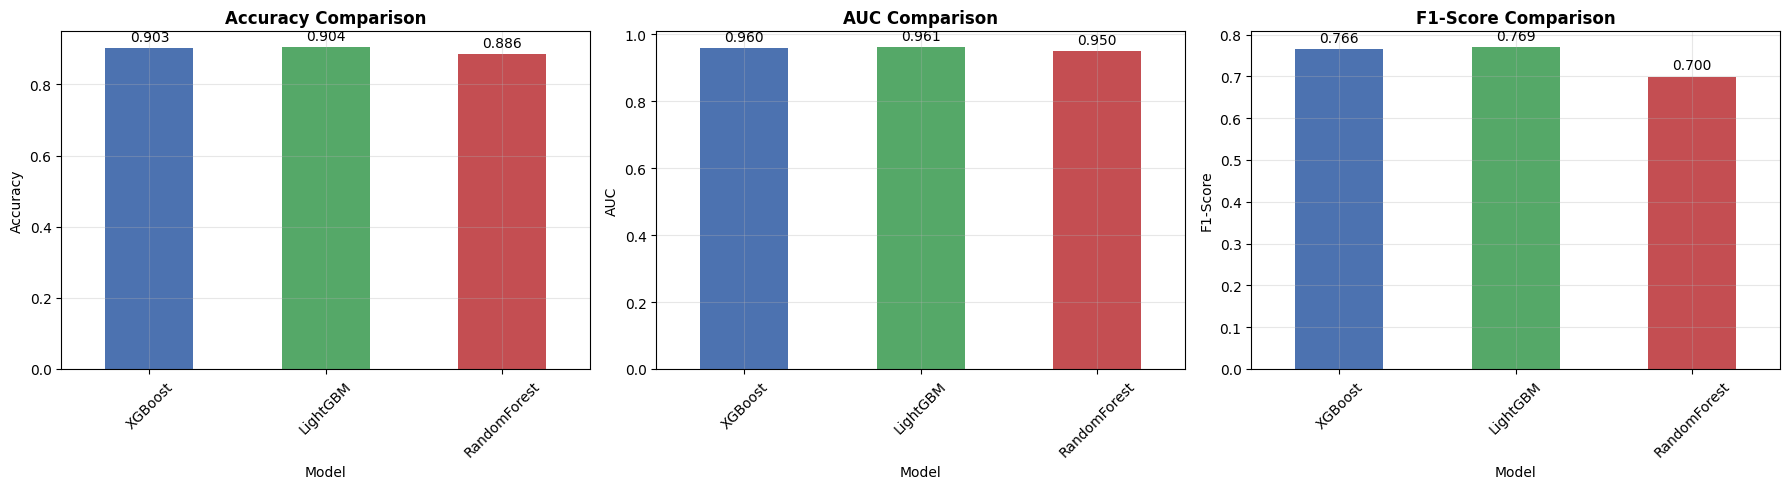

In [53]:
# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.round(4))
palette = ['#4C72B0', '#55A868', '#C44E52']

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['Accuracy', 'AUC', 'F1-Score']
for idx, metric in enumerate(metrics):
    results_df[metric].plot(kind='bar', ax=axes[idx], color= palette)
    axes[idx].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(metric, fontsize=10)
    axes[idx].set_xlabel('Model', fontsize=10)
    axes[idx].set_xticklabels(results_df.index, rotation=45)
    axes[idx].grid(alpha=0.3)
    
    # Add value labels
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

In [54]:
# Calculate SHAP values for all models
import shap
shap_values_dict = {}
explainers_dict = {}

# Use a subset for faster computation
X_test_sample = X_test.iloc[:500]

for name, model in trained_models.items():
    
    # Create SHAP explainer
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_sample)
    
    # For binary classification, some models return list of arrays
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # Take positive class
    
    shap_values_dict[name] = shap_values
    explainers_dict[name] = explainer
    
    print(f"SHAP values computed for {name}")

/Users/aman/miniconda3/envs/credit/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHAP values computed for XGBoost


/Users/aman/miniconda3/envs/credit/lib/python3.13/site-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


SHAP values computed for LightGBM
SHAP values computed for RandomForest


SHAP Summary Plot: XGBoost


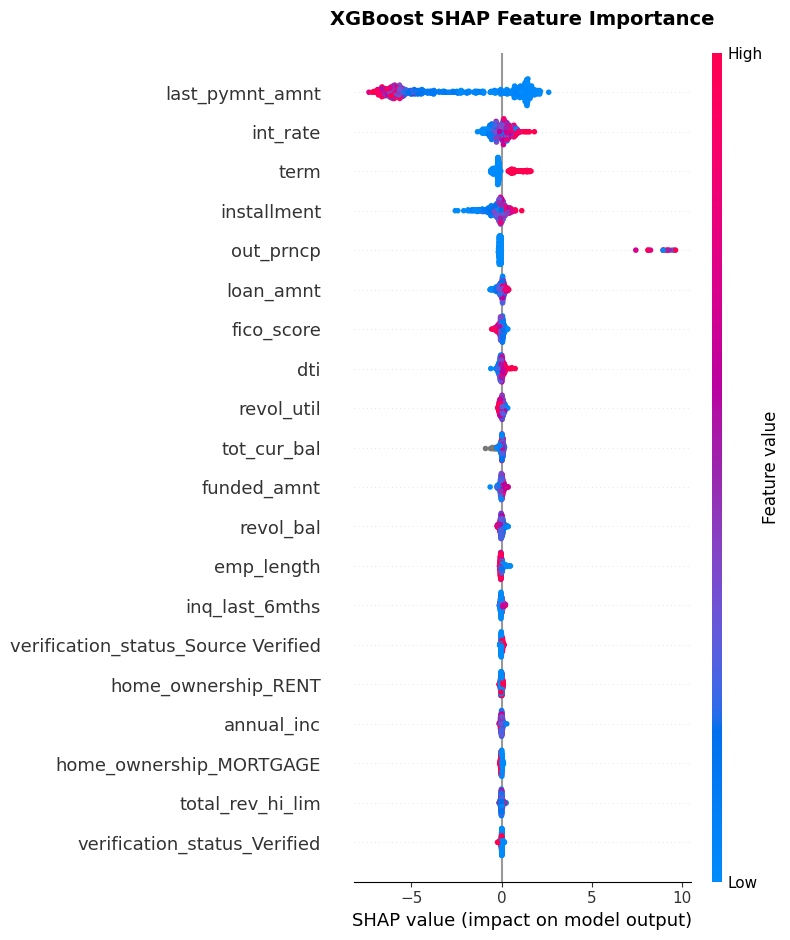

SHAP Summary Plot: LightGBM


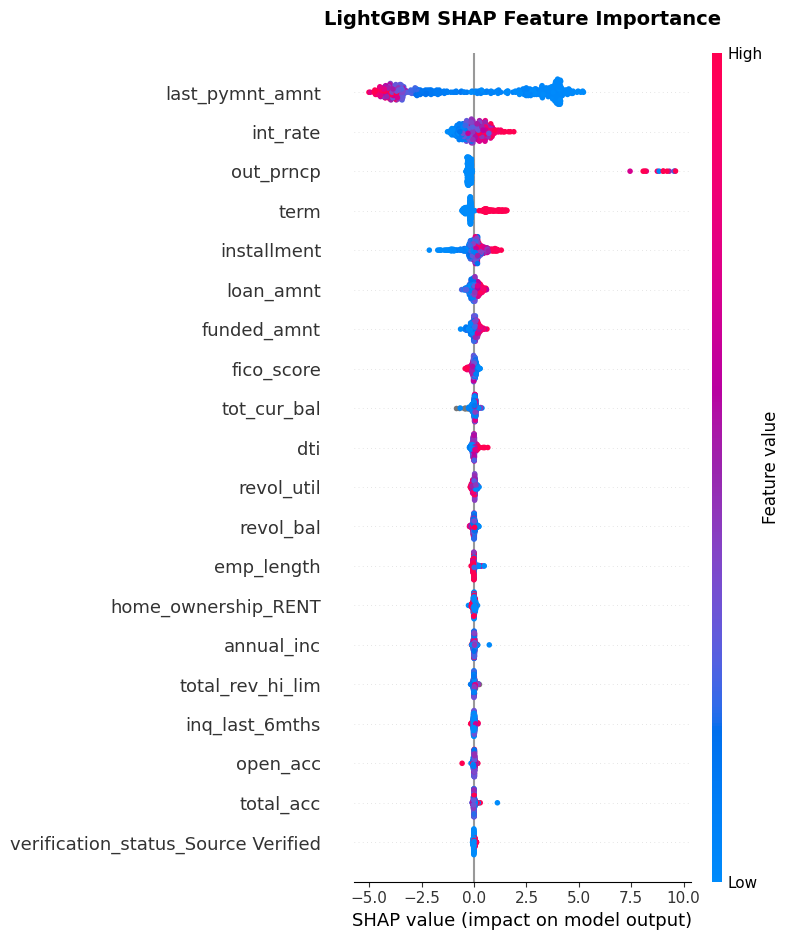

SHAP Summary Plot: RandomForest


<Figure size 1000x800 with 0 Axes>

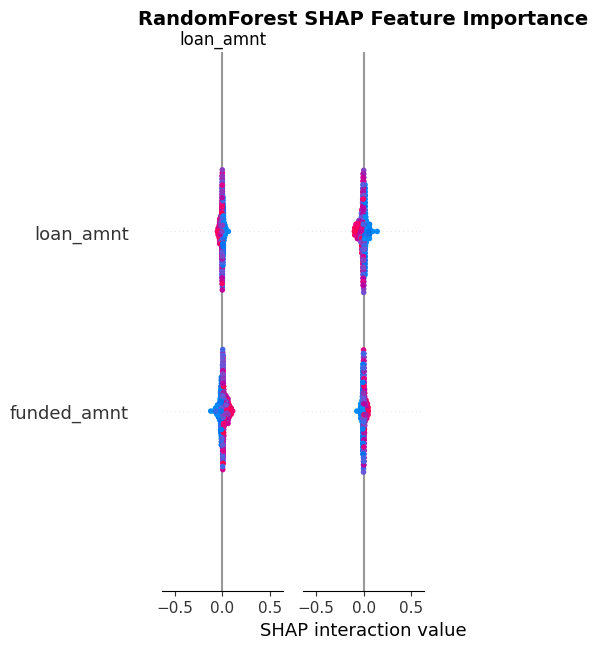

In [55]:
# SHAP Summary Plot for each model
for name in trained_models.keys():
    print(f"SHAP Summary Plot: {name}")
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values_dict[name], X_test_sample, show=False,color= palette )
    plt.title(f'{name} SHAP Feature Importance', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

In [56]:
# Generate default probability for each row using LightGBM
default_probability = trained_models['LightGBM'].predict_proba(X_test)[:, 1]

In [57]:
# Add default probability to test dataframe
X_test['default_probability'] = trained_models['LightGBM'].predict_proba(X_test)[:, 1]

In [58]:
X_test

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_score,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,emp_length,total_acc,term,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,default_probability
1314102,30000.0,30000.0,0.2199,828.40,135000.0,25.96,1.0,687.0,3.0,28.0,0.0,57637.0,0.927,0.0,18868.24,508446.0,64400.0,3,50.0,60,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0.003033
482864,30000.0,30000.0,0.0993,967.03,150000.0,1.77,0.0,727.0,1.0,11.0,1.0,11582.0,0.330,0.0,22791.08,503683.0,35100.0,1,34.0,36,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0.000466
1299576,6000.0,6000.0,0.1199,199.26,30000.0,15.28,0.0,687.0,0.0,7.0,0.0,5423.0,0.638,0.0,199.14,13502.0,11500.0,10,11.0,36,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.332737
1978356,30000.0,30000.0,0.0759,934.43,320000.0,11.70,0.0,762.0,1.0,14.0,0.0,4326.0,0.075,0.0,28826.65,1012403.0,57600.0,10,46.0,36,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0.000326
60656,6000.0,6000.0,0.0917,191.28,55000.0,14.36,0.0,697.0,3.0,5.0,0.0,5092.0,0.780,0.0,2735.08,52022.0,6500.0,1,8.0,36,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0.000619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836270,12000.0,12000.0,0.1580,290.55,46000.0,6.52,0.0,667.0,3.0,6.0,0.0,9043.0,0.508,0.0,3279.77,322543.0,17800.0,7,13.0,60,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,0.003827
396836,25600.0,25600.0,0.0749,796.21,116500.0,12.81,0.0,702.0,0.0,18.0,1.0,23791.0,0.272,0.0,17826.90,53867.0,87500.0,9,32.0,36,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.000271
71267,5000.0,5000.0,0.1367,170.09,70000.0,33.19,0.0,667.0,2.0,13.0,0.0,19215.0,0.640,0.0,170.09,164240.0,30000.0,10,23.0,36,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,0.549302
906723,12000.0,12000.0,0.1199,398.52,45000.0,15.28,0.0,727.0,1.0,11.0,0.0,7341.0,0.245,0.0,327.65,17145.0,30000.0,1,19.0,36,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,0.272689


In [62]:
X_test = X_test.drop(columns=['default_probability'])

In [63]:
from sklearn.utils import resample
from sklearn.metrics import recall_score, precision_score
import numpy as np

# Step 1: Get predictions for original test set
default_probability = trained_models['LightGBM'].predict_proba(X_test)[:, 1]
y_pred = trained_models['LightGBM'].predict(X_test)

# Step 2: Calculate model performance metrics
recall_class1 = recall_score(y_test, y_pred)
precision_class1 = precision_score(y_test, y_pred)
f1_class1 = results['LightGBM']['F1-Score']

print(f"Model Performance Metrics:")
print(f"Recall (sensitivity to defaults): {recall_class1:.2%}")
print(f"Precision: {precision_class1:.2%}")
print(f"F1-Score: {f1_class1:.2%}")

# Step 3: Bootstrap - resample and recalculate PD many times
portfolio_pds = []

for i in range(1000):  # 1000 iterations
    # Randomly sample row indices WITH replacement
    boot_indices = resample(range(len(default_probability)), random_state=i)
    
    # Get PDs for this bootstrap sample
    boot_pds = default_probability[boot_indices]
    
    # Calculate average PD for this sample
    portfolio_pds.append(boot_pds.mean())

# Step 4: Calculate base confidence interval from bootstrap distribution
portfolio_pd = np.mean(portfolio_pds)
ci_lower_bootstrap = np.percentile(portfolio_pds, 2.5)
ci_upper_bootstrap = np.percentile(portfolio_pds, 97.5)

# Step 5: Adjust CI using recall (model uncertainty)
confidence = recall_class1  # 0 to 1
margin_of_error = portfolio_pd * (1 - confidence)

ci_lower_adjusted = max(0, portfolio_pd - margin_of_error)
ci_upper_adjusted = min(1, portfolio_pd + margin_of_error)

# Step 6: Display results
print(f"\n{'='*60}")
print(f"PORTFOLIO POINT-IN-TIME PD - TEST DATA")
print(f"{'='*60}")
print(f"Portfolio PD: {portfolio_pd:.2%}")
print(f"\nBootstrap CI (sampling uncertainty):")
print(f"  95% CI: [{ci_lower_bootstrap:.2%}, {ci_upper_bootstrap:.2%}]")
print(f"\nRecall-Adjusted CI (model uncertainty):")
print(f"  95% CI: [{ci_lower_adjusted:.2%}, {ci_upper_adjusted:.2%}]")
print(f"  Margin of Error: ±{margin_of_error:.2%}")
print(f"\nInterpretation:")
print(f"  - Model catches {recall_class1:.0%} of actual defaults")
print(f"  - True portfolio PD likely ranges from {ci_lower_adjusted:.2%} to {ci_upper_adjusted:.2%}")
print(f"{'='*60}")

Model Performance Metrics:
Recall (sensitivity to defaults): 72.74%
Precision: 81.62%
F1-Score: 76.92%

PORTFOLIO POINT-IN-TIME PD - TEST DATA
Portfolio PD: 21.94%

Bootstrap CI (sampling uncertainty):
  95% CI: [21.85%, 22.03%]

Recall-Adjusted CI (model uncertainty):
  95% CI: [15.96%, 27.92%]
  Margin of Error: ±5.98%

Interpretation:
  - Model catches 73% of actual defaults
  - True portfolio PD likely ranges from 15.96% to 27.92%
